El sub-paquete 'scipy.integrate' provee métodos para realizar varias técnicas de integración numérica. Para realizar una visión general del modulo se puede utilizar el comando 'help' que provee scipy: help(integrate)

## Integración General 
La función [quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad) provista por scipy sirve para integrar funciones de una sola variable entre dos puntos. Los puntos pueden ser $\pm\infty$ para indicar limistes infinitos de integración. Como ejemplo, supongamos que deseamos integrar la funcion de [bessel](https://en.wikipedia.org/wiki/Bessel_function) jv(2.5, x) a lo largo del intervalo [0,4.5].

$$I=\int_0^{4.5}J_{2.5}(x)\;dx$$

Esto también puede ser computado usando quad:

In [5]:
import scipy.integrate as integrate
import scipy.special as special

result = integrate.quad(lambda x: special.jv(2.5,x), 0, 4.5)
result

(1.1178179380783253, 7.866317182537226e-09)

El primer argumento de la función quad es objeto Python 'invocable' (Por ejemplo una función, método o una instancia de clase). A tener en cuenta el uso de una función lambda para pasar el objeto invocable a la función 'quad'. Los siguientes dos argumentos, son los limites de integración. El valor de retorno es una tupla, donde el primer elemento es el valor de la estimación  y el segundo elemento es el error de integración. 

Si la función a integrar requiere parámetros adicionales, ellos pueden ser provistos en el argumento 'args'. Supongamos que queremos calcular la siguiente integral: 

$$I(a,b)=\int_0^{1}ax^2+b\;dx$$

In [8]:
from scipy.integrate import quad

def integrand(x, a, b):
    return a*x**2 + b

a = 2
b = 1
I = quad(integrand, 0, 1, args=(a,b))
I

(1.6666666666666667, 1.8503717077085944e-14)

Entradas infinitas también son permitidas en quad utilizando $\pm$ "inf" como uno de los argumentos. Por ejemplo, supongamos que se quiere calcular el valor numérico para la integral exponencial: 

$$E_n(x)=\int_1^\infty {{\exp^{-xt}}\over{t^n}}\;dt$$

In [9]:
import numpy as np
from scipy.integrate import quad

def integrand(t, n, x):
    return np.exp(-x*t) / t**n

def expint(n, x):
    return quad(integrand, 1, np.inf, args=(n, x))[0]

# vectorizo la función para que esta pueda recibir un array de puntos como argumento 
vec_expint = np.vectorize(expint)

# Genero un array desde 1 a 4 con un step de 0.5 y paso el mismo a la función vectorizada 
vec_expint(3, np.arange(1.0, 4.0, 0.5))

array([ 0.10969197,  0.05673949,  0.03013338,  0.01629537,  0.00893065,
        0.00494538])

## Integración Múltiple General 
La mecánica para la integración doble y triple de scipy, esta embebida en las funciones [dblquad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.dblquad.html#scipy.integrate.dblquad) y [tplquad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.tplquad.html#scipy.integrate.tplquad). Estas funciones, toman la función a integrar y 4 o 6 argumentos respectivamente. Los limites para las integrales internas, tienen que ser definidas como funciones. 

Ejemplo:

$$I(n)=\int_{t=0}^1 \int_{x=-\infty}^{+\infty}{e^{-xt}\over t^n}\;dx\;dt$$

In [10]:
from scipy.integrate import quad, dblquad
def I(n):
    return dblquad(lambda t, x: np.exp(-x*t)/t**n, 0, np.inf, lambda x: 1, lambda x: np.inf)

In [11]:
print(I(4))

print(I(3))

print(I(2))

(0.2500000000043577, 1.2983033469368098e-08)
(0.33333333325010883, 1.3888461883425516e-08)
(0.4999999999985751, 1.3894083651858995e-08)


Para integraciones con limites no constantes, considerar el siguiente ejemplo: 

$$I_n=\int_{y=0}^{1/2} \int_{x=0}^{1-2y}xy\;dx\;dy={1 \over 96}$$

In [12]:
from scipy.integrate import dblquad
area = dblquad(lambda x, y: x*y, 0, 0.5, lambda x: 0, lambda x: 1-2*x)
area

(0.010416666666666668, 4.101620128472366e-16)

Para el calculo de n múltiples integrales, scipy provee la función [nquad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.nquad.html#scipy.integrate.nquad). Los limites de integración son un objeto iterable: Ya sea una lista de límites constantes o una lista de funciones para los límites de integración no constantes. El orden de integración (y también el de los limites de integración) es de la integral más interna a la más externa. 

Ejemplo:

$$I_n=\int_{0}^{\infty} \int_{0}^{\infty}{e^{-xt}\over t^n}\;dt\;dx={1 \over n}$$

puede ser calculada así:

In [15]:
from scipy import integrate
N = 4
def f(t, x):
   return np.exp(-x*t) / t**N

integrate.nquad(f, [[1, np.inf],[0, np.inf]])

(0.2500000000043577, 1.2983033469368098e-08)

El orden de los argumentos de $f$ debe corresponder con el orden de los limites de integración. 
Los limites de integración no constantes, pueden ser tratados de manera similar. Si tomamos el ejemplo previo: 

$$I_n=\int_{y=0}^{1/2} \int_{x=0}^{1-2y}xy\;dx\;dy={1 \over 96}$$

In [20]:
from scipy import integrate
def f(x, y):
    return x*y

def bounds_y():
    return [0, 0.5]

def bounds_x(y):
    return [0, 1-2*y]

integrate.nquad(f, [bounds_x, bounds_y])

(0.010416666666666668, 4.101620128472366e-16)

## Integración utilizando muestras 
Si las muestras son igualmente espaciadas y el numero de muestras disponible es $2^k+1$ para algún entero $k$, entonces el [método de integración de Romberg](https://en.wikipedia.org/wiki/Romberg%27s_method) [romb](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romb.html#scipy.integrate.romb) puede ser utilizado para obtener estimaciones de alta precisión de la integral utilizando las muestras disponibles. 
En el caso de muestras espaciadas arbitrariamente, las funciones [trapz](https://docs.scipy.org/doc/numpy/reference/generated/numpy.trapz.html) (definida en numpy) y [simps](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html#scipy.integrate.simps) están disponibles. 

Para la integral:

$$\int_1^4 x^2\;dx=21$$

In [18]:
import numpy as np
def f1(x):
   return x**2

x = np.array([1,3,4])
y1 = f1(x)
from scipy.integrate import simps
I1 = simps(y1, x)
print(I1)

21.0


Utilizando la regla trapezoidal:

In [19]:
import numpy as np
def f1(x):
   return x**2

x = np.array([1,3,4])
y1 = f1(x)
I2 = np.trapz(y1, x)
print(I2)

22.5


Un toroide puede ser definido parametricamente como: 

$x(\theta,\varphi)=(R+r\;cos\;\theta)\;cos\;\varphi$

$y(\theta,\varphi)=(R+r\;cos\;\theta)\;sin\;\varphi$

$x(\theta,\varphi)=r\;sin\;\theta$

donde $\theta,\varphi$ son los ángulos que forman el circulo completo, por lo tanto sus valores comienzan y terminan en el mismo punto, $R$ es la distancia desde el centro del tubo al centro del toroide, $r$ es el radio del tubo.

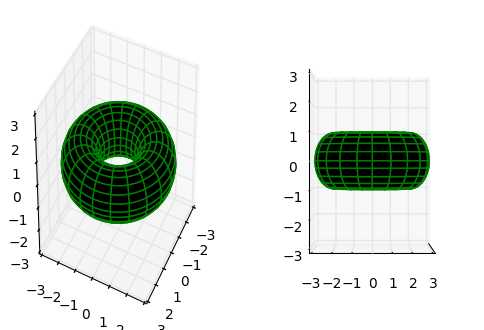

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

n = 100

theta = np.linspace(0, 2.*np.pi, n)
phi = np.linspace(0, 2.*np.pi, n)
theta, phi = np.meshgrid(theta, phi)
R, r = 2, 1
x = (R + r * np.cos(theta)) * np.cos(phi)
y = (R + r * np.cos(theta)) * np.sin(phi)
z = r * np.sin(theta)

fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_zlim(-3,3)
ax1.plot_surface(x, y, z, rstride=5, cstride=5, color='k', edgecolors='g')
ax1.view_init(36, 26)
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_zlim(-3,3)
ax2.plot_surface(x, y, z, rstride=5, cstride=5, color='k', edgecolors='g')
ax2.view_init(0, 0)
ax2.set_xticks([])
plt.show()

El volumen de un toroide puede ser calculado teóricamente como: 

$$V=2\pi^2Rr^2$$

## Ejercicio

1. Formar grupos de 2 . 
2. Calcular el volumen del toroide, realizando integración numérica con las herramientas vistas y comparar los resultados con el valor teórico del volumen del mismo. 

Ayuda: http://files.eric.ed.gov/fulltext/EJ720058.pdf